In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_ber')

In [3]:
Daten.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,D-Q8b22c,D-Q9_1,D-Q9_2,E-T1,E-Q1,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 442,porc_nan
0,R_1kOiXpqqaX3Irxm,Default Response Set,Anonymous,NaN,NaN,88.3.172.215,0,2017-11-09 13:10:29,2017-11-09 13:25:39,1,...,NaN,NaN,1.0,1,Gratificante y útil,40.968795776367,-5.6638946533203,-1,NaN,72.009029
1,R_1F5FzvY7aYwiipy,Default Response Set,Anonymous,NaN,NaN,212.128.135.110,0,2017-11-10 01:39:27,2017-11-10 01:54:25,1,...,NaN,NaN,1.0,1,Una encuesta muy completa que me ha servido pa...,40.96809387207,-5.6620025634766,-1,NaN,70.428894
2,R_2ErWjTyNYcSh10N,Default Response Set,Anonymous,NaN,NaN,212.128.135.84,0,2017-11-10 02:23:28,2017-11-10 02:39:04,1,...,NaN,NaN,1.0,1,NaN,40.96809387207,-5.6620025634766,-1,NaN,70.880361


Glossar erstellen = Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [4]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [5]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [6]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [7]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embar...')

Grafik (Histogram) anzeigen:

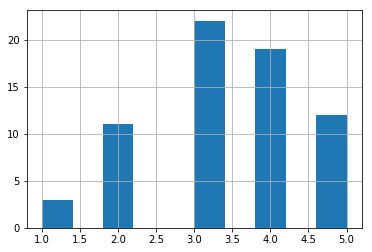

In [8]:
Daten['A_Q3_25'].hist()

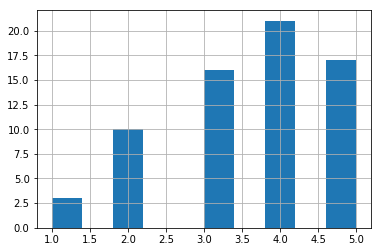

In [9]:
Daten['A_Q3_24'].hist()

Liste erstellen:

In [10]:
Liste_A_Q2 = [col for col in Daten.columns if 'A_Q2' in col]

später sollen Listen für alle Fragenkomplexe erstellt werden (alle Likert zumindest)

In [11]:
Liste_C_Q1 = [col for col in Daten.columns if 'C_Q1' in col]

Funktion erstellen:

Name + in Klammer Variablen
* fig = Figur/Grafik; plt = Library matplotlib aufrufen (hier wird Platz für Grafik reserviert)
* i = Nummer der Figuren - gleiche Reihenfolge wie Spalten (=col) der Liste
* enumerate = Liste durchgehen
* plt.subplot = der Reihe nach Grafiken erstellen, n Zeilen, n Spalten
* plt.hist = erstellt Histogram für angegebene Daten; .dropna -> fehlende Werte weglassen
* plt.title = Titel hinzufügen
* plt.show = Grafiken anzeigen

In [12]:
def graf_hist(l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(Daten[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

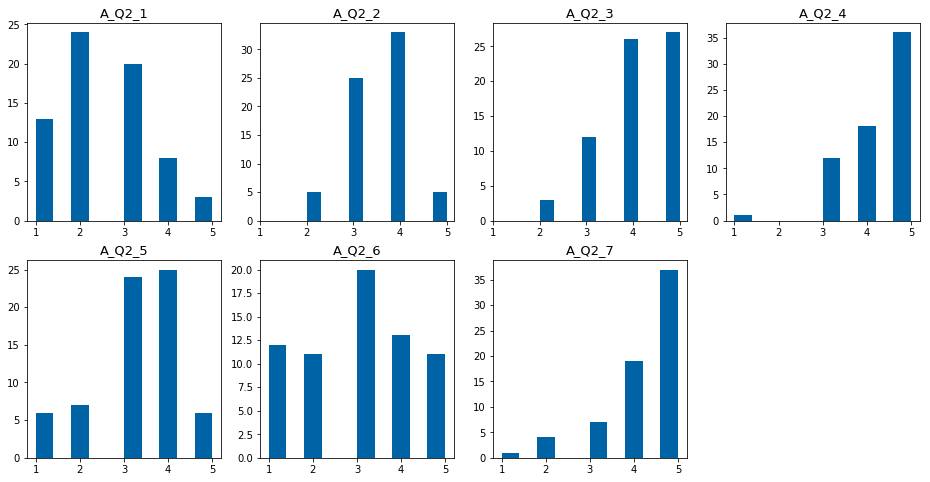

In [13]:
graf_hist(Liste_A_Q2,16,8,2,4)

In [14]:
Liste_A_Q3 = [col for col in Daten.columns if 'A_Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3A_Q3_3_TEXT'

kann noch verbessert werden:

statt Spalte "3" (eigentlich 4, Python zählt ja ab 0) irgendwie "text"-Spalte weglassen

In [15]:
len(Liste_A_Q3)

33

len = Länge der Liste anzeigen

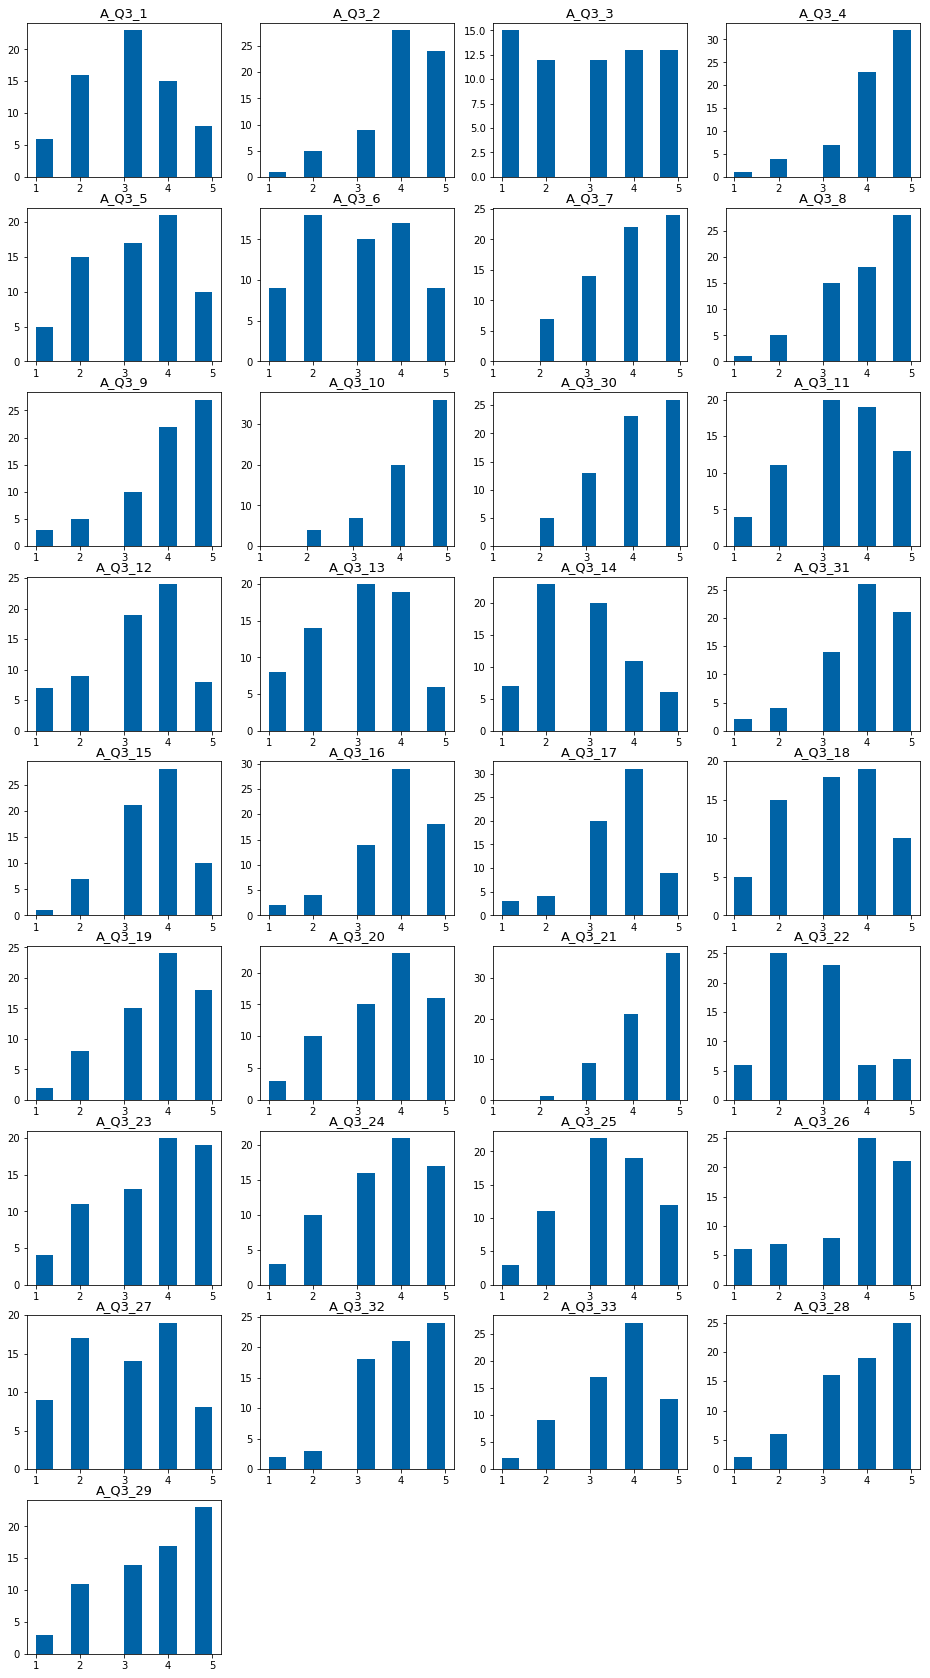

In [16]:
graf_hist(Liste_A_Q3,16,30,9,4)

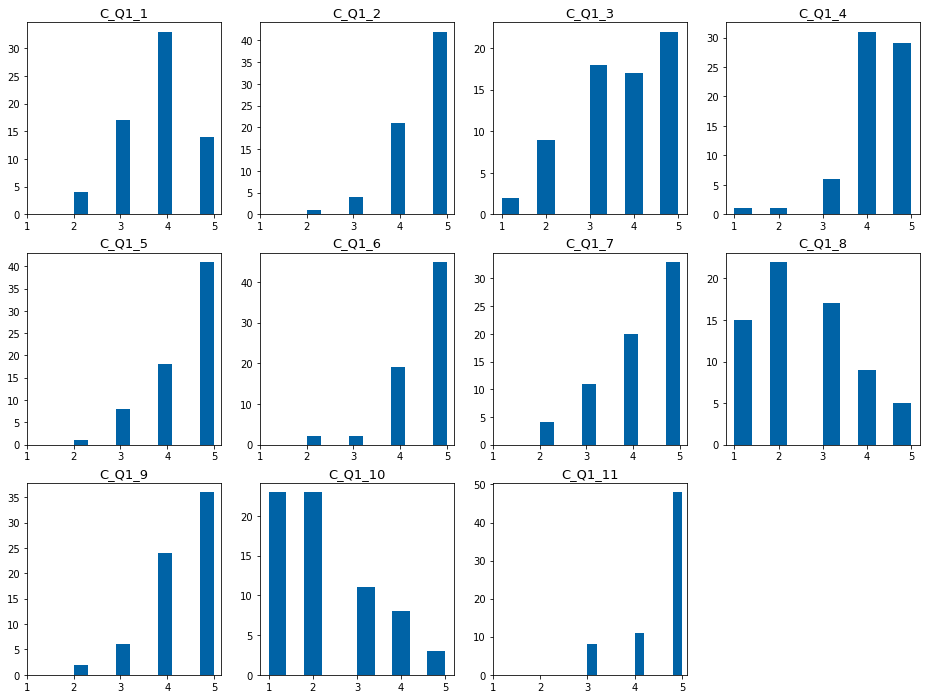

In [17]:
graf_hist(Liste_C_Q1,16,12,3,4)

### Korrelation

Funktion für Korrelationen:

In [18]:
def get_Korr_M(Dat,l):
    return pd.DataFrame(np.corrcoef(Dat[l].dropna().T),columns = l, index = l)

Korrelation für A_Q2:

In [19]:
Korr_A_Q2 = get_Korr_M(Daten,Liste_A_Q2)

Korrelation für A_Q3:

In [20]:
Korr_A_Q3 = get_Korr_M(Daten,Liste_A_Q3)

In [21]:
Korr_C_Q1 = get_Korr_M(Daten,Liste_C_Q1)

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu bekommen:

In [22]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

In [23]:
get_max_corr(Korr_A_Q3,'A_Q3_1', lim = 0.4)

A_Q3_2     0.469917
A_Q3_11    0.405196
A_Q3_12    0.423585
Name: A_Q3_1, dtype: float64

In [24]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.7))

Series([], Name: A_Q3_1, dtype: float64)
Series([], Name: A_Q3_2, dtype: float64)
Series([], Name: A_Q3_3, dtype: float64)
Series([], Name: A_Q3_4, dtype: float64)
Series([], Name: A_Q3_5, dtype: float64)
Series([], Name: A_Q3_6, dtype: float64)
A_Q3_9    0.70272
Name: A_Q3_7, dtype: float64
A_Q3_9    0.756879
Name: A_Q3_8, dtype: float64
A_Q3_7    0.702720
A_Q3_8    0.756879
Name: A_Q3_9, dtype: float64
Series([], Name: A_Q3_10, dtype: float64)
Series([], Name: A_Q3_30, dtype: float64)
Series([], Name: A_Q3_11, dtype: float64)
Series([], Name: A_Q3_12, dtype: float64)
Series([], Name: A_Q3_13, dtype: float64)
Series([], Name: A_Q3_14, dtype: float64)
Series([], Name: A_Q3_31, dtype: float64)
Series([], Name: A_Q3_15, dtype: float64)
Series([], Name: A_Q3_16, dtype: float64)
Series([], Name: A_Q3_17, dtype: float64)
Series([], Name: A_Q3_18, dtype: float64)
Series([], Name: A_Q3_19, dtype: float64)
Series([], Name: A_Q3_20, dtype: float64)
Series([], Name: A_Q3_21, dtype: float64)
Seri

In [25]:
get_max_corr(Korr_C_Q1,'C_Q1_1', lim = 0.4)

C_Q1_4    0.473358
Name: C_Q1_1, dtype: float64

In [26]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C_Q1_1, dtype: float64)
C_Q1_9    0.542577
Name: C_Q1_2, dtype: float64
Series([], Name: C_Q1_3, dtype: float64)
Series([], Name: C_Q1_4, dtype: float64)
Series([], Name: C_Q1_5, dtype: float64)
Series([], Name: C_Q1_6, dtype: float64)
Series([], Name: C_Q1_7, dtype: float64)
Series([], Name: C_Q1_8, dtype: float64)
C_Q1_2    0.542577
Name: C_Q1_9, dtype: float64
Series([], Name: C_Q1_10, dtype: float64)
Series([], Name: C_Q1_11, dtype: float64)


### Cronbach's Alpha berechnen

In [27]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [28]:
CronbachAlpha(Daten[Liste_A_Q3].fillna(3))

0.88585328730929458

In [29]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [30]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [31]:
CronbachAlpha(Daten[Liste_AC_Q].fillna(3))

0.89098715087024827

In [32]:
CronbachAlpha(Daten[Liste_C_Q1].fillna(3))

0.50703764755928948

In [33]:
CronbachAlpha(Daten[Liste_A_Q2].fillna(3))

0.43076144666982069

In [56]:
Liste_A_Q_test = ['A_Q3_8', 'A_Q3_9']

In [57]:
Liste_A_Q_test

['A_Q3_8', 'A_Q3_9']

In [58]:
CronbachAlpha(Daten[Liste_A_Q_test].fillna(3))

0.85516211604095504

### IRT - Graded Response Model

In [60]:
import pystan

In [61]:
graded_irt_model = pystan.StanModel(file="graded_irt.stan")

CRITICAL:pystan:Unable to read file specified by `file`.


FileNotFoundError: [Errno 2] No such file or directory: 'graded_irt.stan'